In [74]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

In [51]:
df = pd.read_csv("housepricedata.csv")

In [52]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [53]:
dataset = df.values

In [54]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [55]:
X = dataset[:,0:10]

In [56]:
Y = dataset[:,10]

In [57]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [58]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [59]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [60]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [61]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [62]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [63]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.4658 - val_loss: 0.6963 - val_accuracy: 0.4201
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4971 - val_loss: 0.6904 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5665 - val_loss: 0.6863 - val_accuracy: 0.5434
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5528 - val_loss: 0.6826 - val_accuracy: 0.5388
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.5763 - val_loss: 0.6790 - val_accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.5636 - val_loss: 0.6754 - val_accuracy: 0.5297
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.5822 - val_loss: 0.6717 - val_accuracy: 0.5616
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8748 - val_loss: 0.3990 - val_accuracy: 0.8356
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8796 - val_loss: 0.3952 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8728 - val_loss: 0.3961 - val_accuracy: 0.8311
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8757 - val_loss: 0.3940 - val_accuracy: 0.8356
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3083 - accuracy: 0.8728 - val_loss: 0.3961 - val_accuracy: 0.8311
Epoch 64/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8777 - val_loss: 0.3925 - val_accuracy: 0.8356
Epoch 65/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8806 - val_loss: 0.3887 - val_accuracy: 0.8447
Epoch 

In [65]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 666us/step - loss: 0.2147 - accuracy: 0.9178


0.9178082346916199

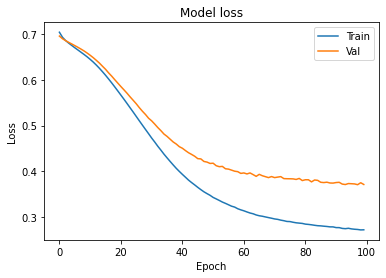

In [66]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

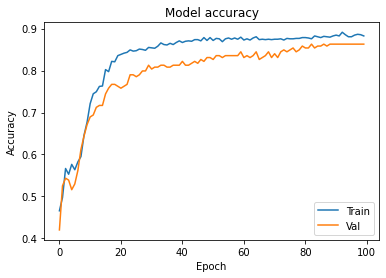

In [69]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [70]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 0.4919 - accuracy: 0.7681 - val_loss: 0.4722 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 0.3721 - accuracy: 0.8562 - val_loss: 0.4227 - val_accuracy: 0.8037
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 0.3274 - accuracy: 0.8738 - val_loss: 0.4456 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 0.2877 - accuracy: 0.8728 - val_loss: 0.3830 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 0.2729 - accuracy: 0.8816 - val_loss: 0.3622 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2579 - accuracy: 0.8943 - val_loss: 0.3559 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 0s 14ms/step - loss: 0.2586 - accuracy: 0.8933 - val_loss: 0.3771 - val_accuracy: 0.8630
Epoch 

32/32 [==============================] - 0s 12ms/step - loss: 0.1619 - accuracy: 0.9247 - val_loss: 0.3871 - val_accuracy: 0.8950
Epoch 59/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1695 - accuracy: 0.9315 - val_loss: 0.4161 - val_accuracy: 0.9041
Epoch 60/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1821 - accuracy: 0.9207 - val_loss: 0.4016 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1576 - accuracy: 0.9344 - val_loss: 0.3992 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1629 - accuracy: 0.9227 - val_loss: 0.4207 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1527 - accuracy: 0.9286 - val_loss: 0.5253 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 0s 12ms/step - loss: 0.1589 - accuracy: 0.9315 - val_loss: 0.4535 - val_accuracy: 0.8904
Epoch 65/100

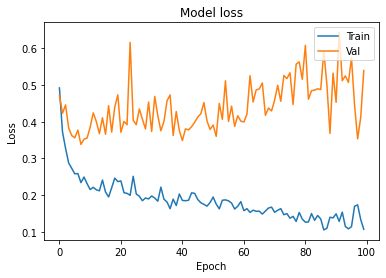

In [71]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

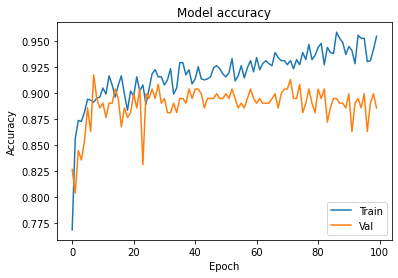

In [73]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [75]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [76]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 23ms/step - loss: 14.2290 - accuracy: 0.5998 - val_loss: 3.9190 - val_accuracy: 0.7397
Epoch 2/100
32/32 [==============================] - 1s 17ms/step - loss: 1.6729 - accuracy: 0.8258 - val_loss: 0.7140 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.5612 - accuracy: 0.8620 - val_loss: 0.6670 - val_accuracy: 0.7717
Epoch 4/100
32/32 [==============================] - 1s 20ms/step - loss: 0.5147 - accuracy: 0.8659 - val_loss: 0.5587 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4995 - accuracy: 0.8816 - val_loss: 0.5392 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.5109 - accuracy: 0.8650 - val_loss: 0.5426 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 20ms/step - loss: 0.4712 - accuracy: 0.8757 - val_loss: 0.5493 - val_accuracy: 0.8356
Epoch

32/32 [==============================] - 1s 17ms/step - loss: 0.4156 - accuracy: 0.8855 - val_loss: 0.5051 - val_accuracy: 0.8584
Epoch 59/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4239 - accuracy: 0.8806 - val_loss: 0.4828 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4395 - accuracy: 0.8738 - val_loss: 0.4875 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4423 - accuracy: 0.8708 - val_loss: 0.5423 - val_accuracy: 0.8356
Epoch 62/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4276 - accuracy: 0.8826 - val_loss: 0.4954 - val_accuracy: 0.8676
Epoch 63/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4345 - accuracy: 0.8777 - val_loss: 0.5090 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 1s 17ms/step - loss: 0.4292 - accuracy: 0.8796 - val_loss: 0.5505 - val_accuracy: 0.8311
Epoch 65/100

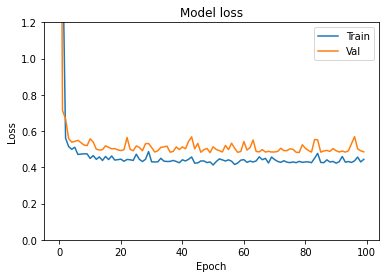

In [77]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

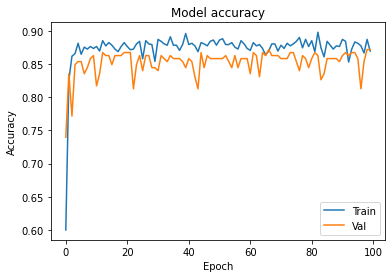

In [78]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()